# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

### Brief Summary

This project aims to utilize mobility and population data at different times to identify optimal locations for mobile vendors in Taipei City, Taiwan.

1. YouBike 2.0 (bike-sharing system) Real-Time Data
2. Top 10 most used/busiest YouBike 2.0 stations: December, 2023
3. Taipei City Population by District: Jan, 2022
   
were introduced to study the spatial and temporial aspects of different districts.

1. Taipei Metro Station Hourly Inbound and Outbound Traffic Statistics
2. Commercial Statistics

might be introduced to study the dynamics of urban lives in the future.

In [ ]:
pip install mapboxgl

In [6]:
import pandas as pd
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint    # library for cleanly printing Python data structures
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pp = pprint.PrettyPrinter()

In [7]:
import geopandas as gpd
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon
import seaborn as sns

### YouBike 2.0 Real-Time Data

In [8]:
endpoint_url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"
response = requests.get(endpoint_url)

In [9]:
results = response.text
print(type(results))
print(results[:500])

<class 'str'>
[{"sno":"500101001","sna":"YouBike2.0_捷運科技大樓站","tot":28,"sbi":24,"sarea":"大安區","mday":"2024-04-25 06:43:18","lat":25.02605,"lng":121.5436,"ar":"復興南路二段235號前","sareaen":"Daan Dist.","snaen":"YouBike2.0_MRT Technology Bldg. Sta.","aren":"No.235， Sec. 2， Fuxing S. Rd.","bemp":4,"act":"1","srcUpdateTime":"2024-04-25 06:53:23","updateTime":"2024-04-25 06:53:25","infoTime":"2024-04-25 06:43:18","infoDate":"2024-04-25"},{"sno":"500101002","sna":"YouBike2.0_復興南路二段273號前","tot":21,"sbi":10,"sarea":"大安區","m


In [10]:
# parse the string into a Python dictionary (loads = "load string")
data = json.loads(results)
print(type(data))
print(data[:3]) # look at the first three items from the selection of the list

<class 'list'>
[{'sno': '500101001', 'sna': 'YouBike2.0_捷運科技大樓站', 'tot': 28, 'sbi': 24, 'sarea': '大安區', 'mday': '2024-04-25 06:43:18', 'lat': 25.02605, 'lng': 121.5436, 'ar': '復興南路二段235號前', 'sareaen': 'Daan Dist.', 'snaen': 'YouBike2.0_MRT Technology Bldg. Sta.', 'aren': 'No.235， Sec. 2， Fuxing S. Rd.', 'bemp': 4, 'act': '1', 'srcUpdateTime': '2024-04-25 06:53:23', 'updateTime': '2024-04-25 06:53:25', 'infoTime': '2024-04-25 06:43:18', 'infoDate': '2024-04-25'}, {'sno': '500101002', 'sna': 'YouBike2.0_復興南路二段273號前', 'tot': 21, 'sbi': 10, 'sarea': '大安區', 'mday': '2024-04-25 06:40:29', 'lat': 25.02565, 'lng': 121.54357, 'ar': '復興南路二段273號西側', 'sareaen': 'Daan Dist.', 'snaen': 'YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.', 'aren': 'No.273， Sec. 2， Fuxing S. Rd. (West)', 'bemp': 11, 'act': '1', 'srcUpdateTime': '2024-04-25 06:53:23', 'updateTime': '2024-04-25 06:53:25', 'infoTime': '2024-04-25 06:40:29', 'infoDate': '2024-04-25'}, {'sno': '500101003', 'sna': 'YouBike2.0_國北教大實小東側門', 'tot': 16, '

In [11]:
df = pd.read_json(endpoint_url)
df.head()

sno                     sna  tot  sbi sarea                 mday  \
0  500101001      YouBike2.0_捷運科技大樓站   28   24   大安區  2024-04-25 06:43:18   
1  500101002  YouBike2.0_復興南路二段273號前   21   10   大安區  2024-04-25 06:40:29   
2  500101003    YouBike2.0_國北教大實小東側門   16    2   大安區  2024-04-25 00:16:19   
3  500101004       YouBike2.0_和平公園東側   11    0   大安區  2024-04-25 06:53:18   
4  500101005    YouBike2.0_辛亥復興路口西北側   16    0   大安區  2024-04-25 03:28:13   

        lat        lng             ar     sareaen  \
0  25.02605  121.54360    復興南路二段235號前  Daan Dist.   
1  25.02565  121.54357   復興南路二段273號西側  Daan Dist.   
2  25.02429  121.54124    和平東路二段96巷7號  Daan Dist.   
3  25.02351  121.54282  和平東路二段118巷33號  Daan Dist.   
4  25.02153  121.54299     復興南路二段368號  Daan Dist.   

                                               snaen  \
0               YouBike2.0_MRT Technology Bldg. Sta.   
1           YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.   
2  YouBike2.0_NTUE Experiment Elementary School (...   
3                      YouBike2.0_Heping Park (East)   
4  YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...   

                                    aren  bemp  act        srcUpdateTime  \
0          No.235， Sec. 2， Fuxing S. Rd.     4    1  2024-04-25 06:53:23   
1   No.273， Sec. 2， Fuxing S. Rd. (West)    11    1  2024-04-25 06:53:23   
2    No. 7， Ln. 96， Sec. 2， Heping E. Rd    14    1  2024-04-25 06:53:23   
3  No. 33， Ln. 118， Sec. 2， Heping E. Rd    11    1  2024-04-25 06:53:23   
4         No. 368， Sec. 2， Fuxing S. Rd.    16    1  2024-04-25 06:53:23   

            updateTime             infoTime    infoDate  
0  2024-04-25 06:53:25  2024-04-25 06:43:18  2024-04-25  
1  2024-04-25 06:53:25  2024-04-25 06:40:29  2024-04-25  
2  2024-04-25 06:53:25  2024-04-25 00:16:19  2024-04-25  
3  2024-04-25 06:53:25  2024-04-25 06:53:18  2024-04-25  
4  2024-04-25 06:53:25  2024-04-25 03:28:13  2024-04-25

In [12]:
df.shape

(1411, 18)

In [13]:
# Check for missing values in each row of the DataFrame
missing_values = df.isnull().any(axis=1)

# Print rows with missing values
rows_with_missing_values = df[missing_values]
print(rows_with_missing_values)

Empty DataFrame
Columns: [sno, sna, tot, sbi, sarea, mday, lat, lng, ar, sareaen, snaen, aren, bemp, act, srcUpdateTime, updateTime, infoTime, infoDate]
Index: []


In [14]:
# Unique District Names
unique_sareaen = df['sareaen'].unique()
print(unique_sareaen)
print()
print("Number of Districts in Taipei City: ", len(unique_sareaen))

['Daan Dist.' 'Datong Dist' 'Shilin Dist' 'Wenshan Dist' 'Zhongzheng Dist'
 'Zhongshan Dist' 'Neihu Dist' 'Beitou Dist' 'Songshan Dist'
 'Nangang Dist' 'Xinyi Dist' 'Wanhua Dist' 'NTU Dist']

Number of Districts in Taipei City:  13


In [15]:
# Replace "Daan Dist." with "Daan Dist" in the "sareaen" column
df['sareaen'] = df['sareaen'].replace('Daan Dist.', 'Daan Dist')

In [16]:
# Group by 'sareaen' column and aggregate other columns as needed
grouped_df = df.groupby('sareaen').size().reset_index(name='num_stations')
grouped_df = grouped_df.sort_values(by='num_stations', ascending=False)
grouped_df = grouped_df.reset_index(drop=True)

# Print the new DataFrame
print(grouped_df)

            sareaen  num_stations
0         Daan Dist           180
1        Neihu Dist           166
2    Zhongshan Dist           153
3       Shilin Dist           125
4   Zhongzheng Dist           119
5        Xinyi Dist           106
6      Wenshan Dist            95
7       Beitou Dist            93
8      Nangang Dist            92
9     Songshan Dist            87
10      Wanhua Dist            80
11      Datong Dist            62
12         NTU Dist            53


In [17]:
df = df.rename(columns={'lng': 'lon','tot': 'total', 'sbi': 'current num_bikes'})
df_Daan = df[df['sareaen'] == 'Daan Dist']
df_Daan

sno                     sna  total  current num_bikes sarea  \
0    500101001      YouBike2.0_捷運科技大樓站     28                 24   大安區   
1    500101002  YouBike2.0_復興南路二段273號前     21                 10   大安區   
2    500101003    YouBike2.0_國北教大實小東側門     16                  2   大安區   
3    500101004       YouBike2.0_和平公園東側     11                  0   大安區   
4    500101005    YouBike2.0_辛亥復興路口西北側     16                  0   大安區   
..         ...                     ...    ...                ...   ...   
175  500101235    YouBike2.0_光復南路420巷口     16                  1   大安區   
176  500101236       YouBike2.0_富陽臥龍街口     18                 13   大安區   
177  500101237       YouBike2.0_仁愛復興路口     25                  2   大安區   
178  500101238   YouBike2.0_仁愛敦南圓環(東側)     16                  2   大安區   
179  500101239         YouBike2.0_古風公園     15                 14   大安區   

                    mday       lat        lon             ar    sareaen  \
0    2024-04-25 06:43:18  25.02605  121.54360    復興南路二段235號前  Daan Dist   
1    2024-04-25 06:40:29  25.02565  121.54357   復興南路二段273號西側  Daan Dist   
2    2024-04-25 00:16:19  25.02429  121.54124    和平東路二段96巷7號  Daan Dist   
3    2024-04-25 06:53:18  25.02351  121.54282  和平東路二段118巷33號  Daan Dist   
4    2024-04-25 03:28:13  25.02153  121.54299     復興南路二段368號  Daan Dist   
..                   ...       ...        ...            ...        ...   
175  2024-04-25 02:03:14  25.03601  121.55742       光復南路438號  Daan Dist   
176  2024-04-25 03:19:19  25.01870  121.55688       富陽街129號前  Daan Dist   
177  2024-04-25 04:27:18  25.03817  121.54400       仁愛路四段1號前  Daan Dist   
178  2024-04-25 01:59:18  25.03804  121.55042      仁愛路四段121號  Daan Dist   
179  2024-04-25 03:49:14  25.02187  121.52912     龍泉街93巷7號對側  Daan Dist   

                                                 snaen  \
0                 YouBike2.0_MRT Technology Bldg. Sta.   
1             YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.   
2    YouBike2.0_NTUE Experiment Elementary School (...   
3                        YouBike2.0_Heping Park (East)   
4    YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...   
..                                                 ...   
175                 YouBike2.0_Ln. 420， GuangFu S. Rd.   
176    YouBike2.0_FuYang St. & WoLong St. Intersection   
177     YouBike2.0_RenAi Rd. & FuXing Rd. Intersection   
178     YouBike2.0_RenAi DunNan Traffic Circle  (East)   
179                             YouBike2.0_GuFeng Park   

                                       aren  bemp  act        srcUpdateTime  \
0             No.235， Sec. 2， Fuxing S. Rd.     4    1  2024-04-25 06:53:23   
1      No.273， Sec. 2， Fuxing S. Rd. (West)    11    1  2024-04-25 06:53:23   
2       No. 7， Ln. 96， Sec. 2， Heping E. Rd    14    1  2024-04-25 06:53:23   
3     No. 33， Ln. 118， Sec. 2， Heping E. Rd    11    1  2024-04-25 06:53:23   
4            No. 368， Sec. 2， Fuxing S. Rd.    16    1  2024-04-25 06:53:23   
..                                      ...   ...  ...                  ...   
175                 No. 438， GuangFu S. Rd.    15    1  2024-04-25 06:53:23   
176                     No. 129， FuYang St.     5    1  2024-04-25 06:53:23   
177                No. 1， Sec. 4， RenAi Rd.    23    1  2024-04-25 06:53:23   
178              No. 121， Sec. 4， RenAi Rd.    14    1  2024-04-25 06:53:23   
179  No. 7， Ln. 93， LongQuan St. (Opposite)     1    1  2024-04-25 06:53:23   

              updateTime             infoTime    infoDate  
0    2024-04-25 06:53:25  2024-04-25 06:43:18  2024-04-25  
1    2024-04-25 06:53:25  2024-04-25 06:40:29  2024-04-25  
2    2024-04-25 06:53:25  2024-04-25 00:16:19  2024-04-25  
3    2024-04-25 06:53:25  2024-04-25 06:53:18  2024-04-25  
4    2024-04-25 06:53:25  2024-04-25 03:28:13  2024-04-25  
..                   ...                  ...         ...  
175  2024-04-25 06:53:25  2024-04-25 02:03:14  2024-04-25  
176  2024-04-25 06:53:25  2024-04-25 03:19:19  2024-04-25  
177  2024-04-25 06:53:25  2024-04-2

In [18]:
with open('data/mapbox_api_key.json', 'r') as f:
    token = json.load(f)['key']

In [48]:
import os
from mapboxgl.viz import *
from mapboxgl.utils import *

# Convert the filtered data to GeoJSON
geojson_data = df_to_geojson(df,
                                properties=['sno', 'sna', 'total', 'current num_bikes', 'sareaen', 'infoTime'], #, 'mday', 'ar', 'sareaen', 'snaen', 'aren', 'bemp', 'act', 'srcUpdateTime', 'updateTime', 'infoTime', 'infoDate'],
                                lat='lat', lon='lon',
                                precision=6)

# Generate data breaks using numpy quantiles and color stops from colorBrewer
measure = 'current num_bikes'
color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(1, 9)]
color_stops = create_color_stops(color_breaks, colors='RdYlBu')

# # Initialize CircleViz
# viz = CircleViz(geojson_data, 
#                 access_token=token,
#                 height='500px',
#                 label_property='sno',
#                 color_property='sbi',
#                 color_default='grey',
#                 color_function_type='match',
#                 color_stops=[['大安區', 'rgb(211,47,47)']],
#                 #              # ['松山區', 'rgb(81,45,168)']], # You can add more color stops for other areas
#                 radius=1,
#                 center=[121.5436, 25.02605], # Center of the map
#                 zoom=12) # Zoom level



# Create the viz from the dataframe
viz = CircleViz(geojson_data,
                access_token=token, 
                height='600px',
                color_property="current num_bikes",
                color_stops=color_stops,
                radius=1.5,
                stroke_color='black',
                stroke_width=0.2,
                opacity=0.75,
                center=(121.5436, 25.02605),
                zoom=12)
                # below_layer='waterway-label')


# Render map
viz.show()

In [21]:
place = "Taipei, Taiwan"
network_type = "walk"
trip_times = [5, 10, 15, 20, 25]  # in minutes
travel_speed = 4.5  # walking speed in km/hour

In [22]:
G = ox.graph_from_place(place, network_type=network_type)
G = ox.project_graph(G)

bounds = ox.geocode_to_gdf(place)
bounds = ox.project_gdf(bounds)

In [23]:
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes["geometry"].unary_union.centroid.xy
center_node = ox.distance.nearest_nodes(G, x[0], y[0])

In [24]:
meters_per_minute = travel_speed * 1000 / 60  # km per hour to m per minute
for _, _, _, data in G.edges(data=True, keys=True):
    data["time"] = data["length"] / meters_per_minute

In [25]:
trip_times = [5,10,15,20,25]

In [26]:
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance="time")
    node_points = [Point((data["x"], data["y"])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)
gdf = gpd.GeoDataFrame(geometry=isochrone_polys)

In [27]:
iso_colors = sns.color_palette("plasma", len(trip_times))

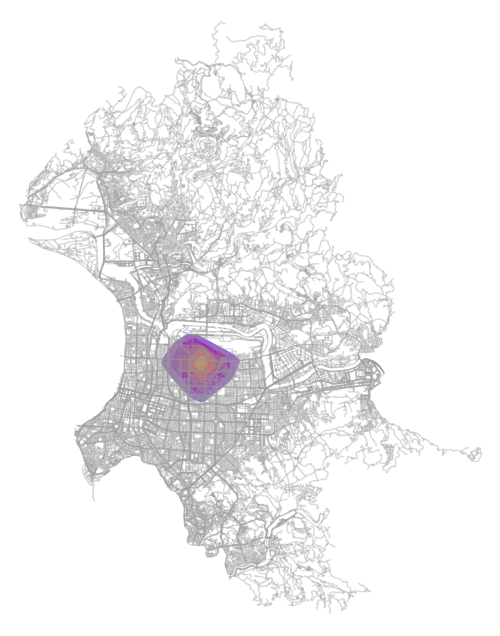

In [28]:
# plot the network then add isochrones as colored polygon patches
fig, ax = ox.plot_graph(
    G, show=False, close=False, edge_color="#999999", edge_alpha=0.2, node_size=0, bgcolor='none'
)
gdf.plot(ax=ax, color=iso_colors, ec="none", alpha=0.6, zorder=-1)
plt.show()

In [37]:
# Function to extract coordinates from GeoJSON data
def extract_coordinates(geojson_data):
    coordinates = []
    for feature in geojson_data['features']:
        lon, lat = feature['geometry']['coordinates']
        coordinates.append((lon, lat))
    return coordinates

# Convert the filtered data to GeoJSON
# Replace the function call and parameters with your actual data and parameters
# geojson_data = df_to_geojson(df, properties=['sno', 'sna', 'total', 'current num_bikes', 'sareaen', 'infoTime'], lat='lat', lon='lon', precision=6)


# Extract coordinates from GeoJSON data
origins = extract_coordinates(geojson_data)

## Multiple Points isochrone

In [38]:
# Convert GeoJSON data to GeoDataFrame
gdf_origins = gpd.GeoDataFrame.from_features(geojson_data["features"])
gdf_origins

geometry        sno                       sna  total  \
0     POINT (121.54360 25.02605)  500101001        YouBike2.0_捷運科技大樓站     28   
1     POINT (121.54357 25.02565)  500101002    YouBike2.0_復興南路二段273號前     21   
2     POINT (121.54124 25.02429)  500101003      YouBike2.0_國北教大實小東側門     16   
3     POINT (121.54282 25.02351)  500101004         YouBike2.0_和平公園東側     11   
4     POINT (121.54299 25.02153)  500101005      YouBike2.0_辛亥復興路口西北側     16   
...                          ...        ...                       ...    ...   
1406  POINT (121.54031 25.01690)  500119087      YouBike2.0_臺大總圖書館西南側     30   
1407  POINT (121.54347 25.01995)  500119088        YouBike2.0_臺大黑森林西側     20   
1408  POINT (121.54242 25.01791)  500119089        YouBike2.0_臺大獸醫館南側     24   
1409  POINT (121.53591 25.02112)  500119090      YouBike2.0_臺大新體育館東南側     40   
1410  POINT (121.54469 25.01816)  500119091  YouBike2.0_臺大明達館北側(員工宿舍)     18   

      current num_bikes    sareaen             infoTime  
0                    24  Daan Dist  2024-04-25 06:43:18  
1                    10  Daan Dist  2024-04-25 06:40:29  
2                     2  Daan Dist  2024-04-25 00:16:19  
3                     0  Daan Dist  2024-04-25 06:53:18  
4                     0  Daan Dist  2024-04-25 03:28:13  
...                 ...        ...                  ...  
1406                  2   NTU Dist  2024-04-25 06:13:18  
1407                  2   NTU Dist  2024-04-25 06:27:14  
1408                  1   NTU Dist  2024-04-25 06:35:14  
1409                  4   NTU Dist  2024-04-25 06:49:19  
1410                  5   NTU Dist  2024-04-25 06:06:19  

[1411 rows x 7 columns]

In [39]:
gdf_origins_new = gdf_origins.head(500)
gdf_origins_new 

geometry        sno                      sna  total  \
0    POINT (121.54360 25.02605)  500101001       YouBike2.0_捷運科技大樓站     28   
1    POINT (121.54357 25.02565)  500101002   YouBike2.0_復興南路二段273號前     21   
2    POINT (121.54124 25.02429)  500101003     YouBike2.0_國北教大實小東側門     16   
3    POINT (121.54282 25.02351)  500101004        YouBike2.0_和平公園東側     11   
4    POINT (121.54299 25.02153)  500101005     YouBike2.0_辛亥復興路口西北側     16   
..                          ...        ...                      ...    ...   
495  POINT (121.51380 25.03907)  500106040          YouBike2.0_介壽公園     23   
496  POINT (121.50772 25.03938)  500106041        YouBike2.0_中華貴陽街口     20   
497  POINT (121.52849 25.04367)  500106042        YouBike2.0_華山文創園區     39   
498  POINT (121.52220 25.04527)  500106043  YouBike2.0_捷運善導寺站(1號出口)     46   
499  POINT (121.52459 25.04193)  500106044        YouBike2.0_濟南紹興路口     39   

     current num_bikes          sareaen             infoTime  
0                   24        Daan Dist  2024-04-25 06:43:18  
1                   10        Daan Dist  2024-04-25 06:40:29  
2                    2        Daan Dist  2024-04-25 00:16:19  
3                    0        Daan Dist  2024-04-25 06:53:18  
4                    0        Daan Dist  2024-04-25 03:28:13  
..                 ...              ...                  ...  
495                  3  Zhongzheng Dist  2024-04-25 05:22:18  
496                  0  Zhongzheng Dist  2024-04-25 02:26:14  
497                 15  Zhongzheng Dist  2024-04-25 05:07:18  
498                  7  Zhongzheng Dist  2024-04-25 05:30:35  
499                 15  Zhongzheng Dist  2024-04-25 03:44:18  

[500 rows x 7 columns]

In [40]:
import osmnx as ox
import pandas as pd
import warnings
import networkx as nx
import geopandas as gpd
import folium
from folium.plugins import HeatMap, MarkerCluster
from shapely.geometry import Point

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=PendingDeprecationWarning)
ox.config(use_cache=True, log_console=False)
# get some cities
cities = ["Hereford"]  # ["Hereford", "Worcester", "Gloucester"]
cities = ox.geocode_to_gdf([{"city": c, "country": "UK"} for c in cities])

# # Set the city and country
# city = "Taipei"
# country = "Taiwan"

# # Get the city data
# city_data = ox.geocode_to_gdf([{"city": city, "country": country}])


In [41]:
# function to get isochrones
def get_isochrone(
    lon, lat, walk_times=[15, 30], speed=4.5, name=None, point_index=None
):
    loc = (lat, lon)
    G = ox.graph_from_point(loc, simplify=True, network_type="walk")
    gdf_nodes = ox.graph_to_gdfs(G, edges=False)
    center_node = ox.distance.nearest_nodes(G, lon, lat)

    meters_per_minute = speed * 1000 / 60  # km per hour to m per minute
    for u, v, k, data in G.edges(data=True, keys=True):
        data["time"] = data["length"] / meters_per_minute
    polys = []
    for walk_time in walk_times:
        subgraph = nx.ego_graph(G, center_node, radius=walk_time, distance="time")
        node_points = [
            Point(data["x"], data["y"]) for node, data in subgraph.nodes(data=True)
        ]
        polys.append(gpd.GeoSeries(node_points).unary_union.convex_hull)
    info = {}
    if name:
        info["sno"] = [name for t in walk_times]
    if point_index:
        info["point_index"] = [point_index for t in walk_times]
    return {**{"geometry": polys, "time": walk_times}, **info}

In [42]:
WT = [5, 10, 15]
STATIONS = 5

# build geopandas data frame of isochrone polygons for each school
isochrones = pd.concat(
    [
        gpd.GeoDataFrame(
            get_isochrone(
                r["geometry"].x,
                r["geometry"].y,
                name=r["sno"],
                point_index=i,
                walk_times=WT,
            ),
            crs=gdf_origins.crs,
        )
        for i, r in gdf_origins_new.head(STATIONS).iterrows()
    ]
)

In [43]:
warnings.filterwarnings("ignore")

gdf = isochrones.set_index(["time", "point_index"]).copy()
# remove shorter walk time from longer walk time polygon to make folium work better
for idx in range(len(WT)-1,0,-1):
    gdf.loc[WT[idx], "geometry"] = (
        gdf.loc[WT[idx]]
        .apply(
            lambda r: r["geometry"].symmetric_difference(
                gdf.loc[(WT[idx-1], r.name), "geometry"]
            ),
            axis=1,
        )
        .values
    )

# Create a Folium map
m = gdf.reset_index().explore(column="time", height=300, width=500, scheme="boxplot")
#m = folium.Map(location=[25.032969, 121.565418], zoom_start=13)
gdf_origins_new.head(STATIONS).explore(m=m, marker_kwds={"radius": 3, "color": "red"})

## Multiple Points Circle

In [44]:
# 原始的包含 1404 個元組的列表
points_tuple_list = [(lon, lat) for lon, lat in origins]

# 將元組列表轉換為嵌套的列表
points_list = [[lon, lat] for lon, lat in points_tuple_list]

# 印出轉換後的列表
print(points_list)

[[121.5436, 25.02605], [121.54357, 25.02565], [121.54124, 25.02429], [121.54282, 25.02351], [121.54299, 25.02153], [121.54328, 25.02429], [121.54326, 25.02253], [121.53407, 25.02112], [121.53384, 25.01976], [121.53361, 25.01894], [121.52982, 25.01986], [121.54332, 25.02543], [121.53202, 25.01717], [121.546446, 25.020348], [121.52989, 25.01927], [121.53156, 25.01895], [121.546705, 25.024461], [121.5331, 25.02093], [121.53549, 25.01385], [121.53438, 25.01491], [121.53661, 25.01244], [121.54142, 25.01451], [121.53973, 25.01295], [121.54062, 25.01137], [121.54165, 25.01182], [121.54382, 25.01426], [121.54503, 25.01234], [121.54656, 25.0136], [121.54698, 25.01537], [121.54535, 25.01637], [121.5452, 25.01664], [121.54291, 25.01576], [121.5476, 25.01787], [121.54497, 25.02032], [121.54432, 25.02076], [121.54284, 25.02101], [121.54081, 25.02104], [121.53626, 25.0222], [121.53474, 25.02218], [121.54471, 25.01727], [121.546622, 25.022864], [121.54704, 25.021641], [121.544069, 25.021469], [121.53

In [45]:
for i in range(len(points_list)):
    # Check if the current point has two elements
    if len(points_list[i]) == 2:
        # Swap the elements
        points_list[i][0], points_list[i][1] = points_list[i][1], points_list[i][0]

In [46]:
def add_circles_to_map(points, map_obj):
    for point in points:
        map_obj.add_child(folium.Circle(location=point,
                                         color='green',  # Circle 顏色
                                         radius=30,  # Circle 寬度
                                         popup='Skytree',  # 彈出視窗內容
                                         fill=True,  # 填滿中間區域
                                         fill_opacity=0.5  # 設定透明度
                                         ))

# 測試程式碼
center_pos = [25.032969, 121.565418]
fmap = folium.Map(location=center_pos, zoom_start=17)
add_circles_to_map(points_list, fmap)
fmap

In [47]:
Taipei_map_4 = folium.Map(location=[25.032969, 121.565418], tiles='openstreetmap', zoom_start=15)
HeatMap(data = points_list, radius = 30).add_to(Taipei_map_4)
Taipei_map_4

## Multiple Points isochrone _2

pip install routingpy

In [34]:
import geopandas as gp
import pandas as pd
from shapely.geometry import Polygon
from routingpy.routers import MapboxOSRM
import numpy as np

mb = MapboxOSRM(api_key = token)

In [140]:
def mb_isochrone(gdf, time = [5, 10, 15], profile = "walking"):

    # Grab X and Y values in 4326
    gdf['LON_VALUE'] = gdf.to_crs(4326).geometry.x
    gdf['LAT_VALUE'] = gdf.to_crs(4326).geometry.y

    coordinates = gdf[['LON_VALUE', 'LAT_VALUE']].values.tolist()

    # Build a list of shapes
    isochrone_shapes = []

    #meters_per_minute = speed * 1000 / 60 #km per hour to m per minute

    if type(time) is not list:
        time = [time]

    # Use minutes as input, but the API requires seconds
    time_seconds = [60 * x for x in time]

    # Given the way that routingpy works, we need to iterate through the list of 
    # coordinate pairs, then iterate through the object returned and extract the 
    # isochrone geometries.  
    for c in coordinates:
        iso_request = mb.isochrones(locations = c, profile = profile,
                                    intervals = time_seconds, polygons = "true")

        for i in iso_request:
            if i.geometry:  # check no empty geometry
                iso_geom = Polygon(i.geometry[0])
                isochrone_shapes.append(iso_geom)

    # Here, we re-build the dataset but with isochrone geometries
    df_values = gdf.drop(columns = ['geometry', 'LON_VALUE', 'LAT_VALUE'])

    time_col = time * len(df_values)

    # We'll need to repeat the dataframe to account for multiple time intervals
    df_values_rep = pd.DataFrame(np.repeat(df_values.values, len(time_seconds), axis = 0))
    df_values_rep.columns = df_values.columns

    isochrone_gdf = gp.GeoDataFrame(
        data = df_values_rep,
        geometry = isochrone_shapes,
        crs = 4326
    )

    isochrone_gdf['time'] = time_col

    # We are sorting the dataframe in descending order of time to improve visualization
    # (the smallest isochrones should go on top, which means they are plotted last)
    isochrone_gdf = isochrone_gdf.sort_values('time', ascending = False)

    return(isochrone_gdf)

In [143]:
# 將 GeoDataFrame 的 CRS 設置為特定的坐標系統
gdf_origins_new.crs = "EPSG:4326"  # 例如，WGS84坐標系統

# 使用mb_isochrone之前，確保 GeoDataFrame 的幾何列具有 CRS
gdf_origins_new.set_crs(epsg=4326, inplace=True)

# 確保 CRS 設置完成後再使用 mb_isochrone 函數
library_isos = mb_isochrone(gdf_origins_new, time=2, profile="walking")

# 顯示結果
library_isos.explore()

In [67]:
gdf_origins.head()

geometry        sno                     sna  total  \
0  POINT (121.54360 25.02605)  500101001      YouBike2.0_捷運科技大樓站     28   
1  POINT (121.54357 25.02565)  500101002  YouBike2.0_復興南路二段273號前     21   
2  POINT (121.54124 25.02429)  500101003    YouBike2.0_國北教大實小東側門     16   
3  POINT (121.54282 25.02351)  500101004       YouBike2.0_和平公園東側     11   
4  POINT (121.54299 25.02153)  500101005    YouBike2.0_辛亥復興路口西北側     16   

   current num_bikes    sareaen             infoTime  
0                 12  Daan Dist  2024-04-11 15:21:21  
1                  1  Daan Dist  2024-04-11 15:19:14  
2                  0  Daan Dist  2024-04-11 15:21:21  
3                  2  Daan Dist  2024-04-11 15:19:21  
4                  4  Daan Dist  2024-04-11 15:21:21

In [68]:
gdf_origins_new.head()

geometry        sno                     sna  total  \
0  POINT (121.54360 25.02605)  500101001      YouBike2.0_捷運科技大樓站     28   
1  POINT (121.54357 25.02565)  500101002  YouBike2.0_復興南路二段273號前     21   
2  POINT (121.54124 25.02429)  500101003    YouBike2.0_國北教大實小東側門     16   
3  POINT (121.54282 25.02351)  500101004       YouBike2.0_和平公園東側     11   
4  POINT (121.54299 25.02153)  500101005    YouBike2.0_辛亥復興路口西北側     16   

   current num_bikes    sareaen             infoTime  LON_VALUE  LAT_VALUE  
0                 12  Daan Dist  2024-04-11 15:21:21  121.54360   25.02605  
1                  1  Daan Dist  2024-04-11 15:19:14  121.54357   25.02565  
2                  0  Daan Dist  2024-04-11 15:21:21  121.54124   25.02429  
3                  2  Daan Dist  2024-04-11 15:19:21  121.54282   25.02351  
4                  4  Daan Dist  2024-04-11 15:21:21  121.54299   25.02153

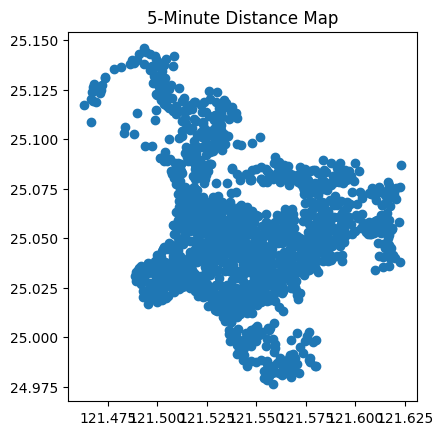

In [54]:
# Load the GeoJSON data into a GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geojson_data)

# Plot the GeoDataFrame
ax = gdf.plot()

# Add title and labels
plt.title("5-Minute Distance Map")


# Show the plot
plt.show()

In [61]:
import folium

In [64]:
# Create a map with the bike station locations overlaid on a static map
folium.Map(location=[25.032969, 121.565418], tiles='OpenStreetMap') # Taipei

In [102]:
import requests

# Define the starting point for the isochrone
origin = "121.565418,25.032969"  # Taipei coordinates

# Define the API endpoint URL
url = f"https://api.mapbox.com/isochrone/v1/mapbox/walking/{origin}"

# Define query parameters
params = {
    "contours_minutes": "5",  # Isochrone intervals in minutes
    "polygons": "true",              # Include polygons in the response
    "access_token": token     # Mapbox access token
}

# Make a GET request to the Mapbox Isochrone API
response = requests.get(url, params=params)

# Print the response content
print(response.json())

{'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 5, 'metric': 'time'}, 'geometry': {'coordinates': [[[121.565418, 25.036093], [121.563418, 25.035073], [121.562716, 25.033671], [121.561824, 25.032969], [121.565418, 25.029776], [121.568418, 25.031393], [121.569899, 25.032969], [121.566866, 25.035417], [121.565418, 25.036093]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'}


In [108]:
# Initialize a Folium map centered at the origin coordinates
m = folium.Map(location=[25.032969, 121.565418], zoom_start=13)

# Add the isochrone polygons to the map
for feature in isochrone_data["features"]:
    time = feature["properties"]["contour"]
    folium.GeoJson(
        feature,
        name=f"Isochrone {time} minutes",
        style_function=lambda x: {
            "fillColor": "green" if time == 5 else "yellow" if time == 2 else "red",
            "color": "green" if time == 5 else "yellow" if time == 2 else "red",
            "weight": 1,
            "fillOpacity": 0.5,
        },
    ).add_to(m)

# Display the map
m

In [111]:
# Function to extract coordinates from GeoJSON data
def extract_coordinates(geojson_data):
    coordinates = []
    for feature in geojson_data['features']:
        lon, lat = feature['geometry']['coordinates']
        coordinates.append((lon, lat))
    return coordinates

# Convert the filtered data to GeoJSON
# Replace the function call and parameters with your actual data and parameters
# geojson_data = df_to_geojson(df, properties=['sno', 'sna', 'total', 'current num_bikes', 'sareaen', 'infoTime'], lat='lat', lon='lon', precision=6)


# Extract coordinates from GeoJSON data
origins = extract_coordinates(geojson_data)

In [126]:
# Initialize a Folium map centered at the origin coordinates
m = folium.Map(location=[25.032969, 121.565418], zoom_start=13)

# Add the isochrone polygons to the map for each origin
for i, (lat, lon) in enumerate(origins):
    # Make a request to the isochrone API for the current origin
    # Make a GET request to the Mapbox Isochrone API
    response = requests.get(url, params=params)
    isochrone_data = response.json()
    # Add isochrone polygons to the map
    for feature in isochrone_data['features']:
        time = feature['properties']['contour']
        folium.GeoJson(
            feature,
            name=f"Isochrone {time} minutes - Origin {i+1}",
            style_function=lambda x: {
                "fillColor": "green" if time == 15 else "yellow" if time == 10 else "red",
                "color": "green" if time == 15 else "yellow" if time == 10 else "red",
                "weight": 1,
                "fillOpacity": 0.5,
            },
        ).add_to(m)

# Display the map
m

### Top 10 most used/busiest YouBike 2.0 stations: December, 2023

In [50]:
endpoint_top10_url = "https://data.taipei/api/v1/dataset/c7a076dd-8aa6-4129-9c8a-e04cbf18694f?scope=resourceAquire"
response_top10 = requests.get(endpoint_top10_url)

In [51]:
results_top10 = response_top10.text
print(type(results_top10))
print(results_top10[:500])

<class 'str'>
{"result":{"limit":20,"offset":0,"count":10,"sort":"","results":[{"_id":1,"_importdate":{"date":"2023-12-28 13:45:49.564652","timezone_type":3,"timezone":"Asia\/Taipei"},"時間":"112年12月","序號（排序）":"1","站位名稱":"捷運公館站(2號出口)"},{"_id":2,"_importdate":{"date":"2023-12-28 13:45:49.578047","timezone_type":3,"timezone":"Asia\/Taipei"},"時間":"112年12月","序號（排序）":"2","站位名稱":"捷運公館站(3號出口)"},{"_id":3,"_importdate":{"date":"2023-12-28 13:45:49.579637","timezone_type":3,"timezone":"Asia\/Taipei"},"時間":"112年12月","序號（排


In [52]:
# parse the string into a Python dictionary (loads = "load string")
data_top10 = json.loads(results_top10)
print(type(data_top10))
list_of_top10_bike_station = list(data_top10.items())
pp.pprint(list_of_top10_bike_station[:3])

<class 'dict'>
[('result',
  {'count': 10,
   'limit': 20,
   'offset': 0,
   'results': [{'_id': 1,
                '_importdate': {'date': '2023-12-28 13:45:49.564652',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '序號（排序）': '1',
                '時間': '112年12月',
                '站位名稱': '捷運公館站(2號出口)'},
               {'_id': 2,
                '_importdate': {'date': '2023-12-28 13:45:49.578047',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '序號（排序）': '2',
                '時間': '112年12月',
                '站位名稱': '捷運公館站(3號出口)'},
               {'_id': 3,
                '_importdate': {'date': '2023-12-28 13:45:49.579637',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '序號（排序）': '3',
                '時間': '112年12月',
                '站位名稱': '捷運科技

In [53]:
results_top10_station_list = list_of_top10_bike_station[0][1]['results']
df_top10_station_list = pd.DataFrame(results_top10_station_list)
df_top10_station_list

_id                                        _importdate       時間 序號（排序）  \
0    1  {'date': '2023-12-28 13:45:49.564652', 'timezo...  112年12月      1   
1    2  {'date': '2023-12-28 13:45:49.578047', 'timezo...  112年12月      2   
2    3  {'date': '2023-12-28 13:45:49.579637', 'timezo...  112年12月      3   
3    4  {'date': '2023-12-28 13:45:49.580808', 'timezo...  112年12月      4   
4    5  {'date': '2023-12-28 13:45:49.582387', 'timezo...  112年12月      5   
5    6  {'date': '2023-12-28 13:45:49.583841', 'timezo...  112年12月      6   
6    7  {'date': '2023-12-28 13:45:49.585408', 'timezo...  112年12月      7   
7    8  {'date': '2023-12-28 13:45:49.586636', 'timezo...  112年12月      8   
8    9  {'date': '2023-12-28 13:45:49.587995', 'timezo...  112年12月      9   
9   10  {'date': '2023-12-28 13:45:49.589252', 'timezo...  112年12月     10   

                站位名稱  
0        捷運公館站(2號出口)  
1        捷運公館站(3號出口)  
2            捷運科技大樓站  
3      捷運芝山站(2號出口)_1  
4            捷運中山國中站  
5        捷運永春站(2號出口)  
6        捷運圓山站(1號出口)  
7             捷運六張犁站  
8  捷運台北101/世貿站(2號出口)  
9       捷運行天宮站(3號出口)

In [54]:
df_top10_station_list = df_top10_station_list[['序號（排序）', '站位名稱']]
df_top10_station_list = df_top10_station_list.rename(columns={'序號（排序）': 'ranking','站位名稱': 'sna'})

df_top10_station_list

ranking                sna
0       1        捷運公館站(2號出口)
1       2        捷運公館站(3號出口)
2       3            捷運科技大樓站
3       4      捷運芝山站(2號出口)_1
4       5            捷運中山國中站
5       6        捷運永春站(2號出口)
6       7        捷運圓山站(1號出口)
7       8             捷運六張犁站
8       9  捷運台北101/世貿站(2號出口)
9      10       捷運行天宮站(3號出口)

In [55]:
df_top10_station_list['sna'] = 'YouBike2.0_' + df_top10_station_list['sna'].astype(str)
df_top10_station_list

ranking                           sna
0       1        YouBike2.0_捷運公館站(2號出口)
1       2        YouBike2.0_捷運公館站(3號出口)
2       3            YouBike2.0_捷運科技大樓站
3       4      YouBike2.0_捷運芝山站(2號出口)_1
4       5            YouBike2.0_捷運中山國中站
5       6        YouBike2.0_捷運永春站(2號出口)
6       7        YouBike2.0_捷運圓山站(1號出口)
7       8             YouBike2.0_捷運六張犁站
8       9  YouBike2.0_捷運台北101/世貿站(2號出口)
9      10       YouBike2.0_捷運行天宮站(3號出口)

In [56]:
df_top10_station_list_in_df = df[df['sna'].isin(df_top10_station_list['sna'])]
df_top10_station_list_in_df

sno                           sna  total  current num_bikes sarea  \
0     500101001            YouBike2.0_捷運科技大樓站     28                 24   大安區   
19    500101022        YouBike2.0_捷運公館站(2號出口)     99                 74   大安區   
49    500101101             YouBike2.0_捷運六張犁站     64                 52   大安區   
123   500101181        YouBike2.0_捷運公館站(3號出口)     90                 72   大安區   
188   500103009        YouBike2.0_捷運圓山站(1號出口)     44                 11   大同區   
346   500104108      YouBike2.0_捷運芝山站(2號出口)_1     62                 14   士林區   
604   500107024            YouBike2.0_捷運中山國中站     62                 21   中山區   
616   500107036       YouBike2.0_捷運行天宮站(3號出口)     42                 32   中山區   
1239  500112070        YouBike2.0_捷運永春站(2號出口)     30                  7   信義區   
1244  500112076  YouBike2.0_捷運台北101/世貿站(2號出口)     52                 26   信義區   

                     mday       lat        lon                     ar  \
0     2024-04-25 06:43:18  25.02605  121.54360            復興南路二段235號前   
19    2024-04-25 06:52:18  25.01491  121.53438          捷運公館站(2號出口)外側   
49    2024-04-25 06:49:18  25.02397  121.55266             和平東路三段410號   
123   2024-04-25 06:50:31  25.01551  121.53374          捷運公館站(3號出口)西側   
188   2024-04-25 06:45:20  25.07133  121.52024               酒泉街235號前   
346   2024-04-25 06:52:18  25.10336  121.52263       福華路/福華路162巷(東南側)   
604   2024-04-25 06:49:18  25.06106  121.54406             復興北路386號南側   
616   2024-04-25 06:50:30  25.05992  121.53330               松江路261號前   
1239  2024-04-25 06:49:18  25.04050  121.57538           虎林街132巷44號西側   
1244  2024-04-25 06:38:18  25.03270  121.56157  捷運台北101/世貿站(2號出口)(西側)   

             sareaen                                              snaen  \
0          Daan Dist               YouBike2.0_MRT Technology Bldg. Sta.   
19         Daan Dist              YouBike2.0_MRT Gongguan Sta. (Exit 2)   
49         Daan Dist                     YouBike2.0_MRT Liuzhangli Sta.   
123        Daan Dist               YouBike2.0_MRT Gongguan Sta.(Exit.3)   
188      Datong Dist              YouBike2.0_MRT Yuanshan Sta. (Exit 1)   
346      Shilin Dist             YouBike2.0_MRT Zhishan Sta. (Exit 2)_1   
604   Zhongshan Dist   YouBike2.0_MRT Zhongshan Junior High School Sta.   
616   Zhongshan Dist       YouBike2.0_MRT Xingtian Temple Sta. (Exit 3)   
1239      Xinyi Dist               YouBike2.0_MRT Yongchun Sta.(Exit.2)   
1244      Xinyi Dist  YouBike2.0_MRT Taipei 101 / World Trade Center...   

                                                   aren  bemp  act  \
0                         No.235， Sec. 2， Fuxing S. Rd.     4    1   
19                           MRT Gongguan Sta. (Exit 2)    25    1   
49                       No. 410， Sec. 3， Heping E. Rd.    12    1   
123                     MRT Gongguan Sta.(Exit.3)(West)    18    1   
188                                No. 235， Jiuquan St.    33    1   
346   Fuhua Rd. & Ln. 162， Fuhua Rd. Intersection (S...    48    1   
604                       No. 386， Fuxing N Rd. (South)    41    1   
616                              No. 261， Songjiang Rd.    10    1   
1239                  No. 44， Ln. 132， Hulin St. (West)    23    1   
1244  MRT Taipei 101 & World Trade Center Sta. (Exit...    25    1   

            srcUpdateTime           updateTime             infoTime  \
0     2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:43:18   
19    2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:52:18   
49    2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:49:18   
123   2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:50:31   
188   2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:45:20   
346   2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:52:18   
604   2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:49:18   
616   2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:50:30   
1239  2024-04-25 06:53:23  2024-04-25 06:53:25  2024-04-25 06:49:18   
1244  202

In [57]:
# Convert the filtered data to GeoJSON
geojson_data_top10 = df_to_geojson(df_top10_station_list_in_df,
                                properties=['sno', 'sna', 'total', 'current num_bikes', 'sareaen', 'infoTime'], #, 'mday', 'ar', 'sareaen', 'snaen', 'aren', 'bemp', 'act', 'srcUpdateTime', 'updateTime', 'infoTime', 'infoDate'],
                                lat='lat', lon='lon',
                                precision=6)

# Generate data breaks using numpy quantiles and color stops from colorBrewer
measure = 'current num_bikes'
color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(1, 9)]
color_stops = create_color_stops(color_breaks, colors='RdYlBu')

# Create the viz from the dataframe
viz = CircleViz(geojson_data_top10 ,
                access_token=token, 
                height='600px',
                color_property="current num_bikes",
                color_stops=color_stops,
                radius=5,
                stroke_color='black',
                stroke_width=0.2,
                opacity=0.75,
                center=(121.5436, 25.02605),
                zoom=12)
                # below_layer='waterway-label')


# Render map
viz.show()

### Taipei City Population: Jan, 2022

In [73]:
endpoint_population_url = "https://data.taipei/api/v1/dataset/9681db4c-fb1b-4a23-9013-e74483b6b046?scope=resourceAquire"
response_population = requests.get(endpoint_population_url)

In [74]:
results_population = response_population.text
print(type(results_population))
print(results_population[:500])

<class 'str'>
{"result":{"limit":20,"offset":0,"count":351,"sort":"","results":[{"_id":1,"_importdate":{"date":"2024-04-08 11:44:48.634338","timezone_type":3,"timezone":"Asia\/Taipei"},"年份":"111","月份":"1","行政區":"  總計 ","里數_現有門牌數值":"456","里數_戶籍登記":"456","鄰數_現有門牌":"9598","鄰數_戶籍登記":"9572","戶數":"1050027","人口數_合計數量":"2514425","人口數_男數量":"1197417","人口數_女數量":"1317008"},{"_id":2,"_importdate":{"date":"2024-04-08 11:44:48.641717","timezone_type":3,"timezone":"Asia\/Taipei"},"年份":"111","月份":"1","行政區":"  松山區 ","里數_現有門牌數值


In [75]:
# parse the string into a Python dictionary (loads = "load string")
data_population = json.loads(results_population)
print(type(data_population))
list_of_population = list(data_population.items())
pp.pprint(list_of_population[:3])

<class 'dict'>
[('result',
  {'count': 351,
   'limit': 20,
   'offset': 0,
   'results': [{'_id': 1,
                '_importdate': {'date': '2024-04-08 11:44:48.634338',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '人口數_合計數量': '2514425',
                '人口數_女數量': '1317008',
                '人口數_男數量': '1197417',
                '年份': '111',
                '戶數': '1050027',
                '月份': '1',
                '行政區': '  總計 ',
                '鄰數_戶籍登記': '9572',
                '鄰數_現有門牌': '9598',
                '里數_戶籍登記': '456',
                '里數_現有門牌數值': '456'},
               {'_id': 2,
                '_importdate': {'date': '2024-04-08 11:44:48.641717',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                '人口數_合計數量': '192511',
                '人口數_女數量': '102430',
                '人口數_男數量': '90081',
                '年份'

In [76]:
results_list = list_of_population[0][1]['results']
df_population = pd.DataFrame(results_list)
df_population

_id                                        _importdate   年份 月份     行政區  \
0     1  {'date': '2024-04-08 11:44:48.634338', 'timezo...  111  1     總計    
1     2  {'date': '2024-04-08 11:44:48.641717', 'timezo...  111  1    松山區    
2     3  {'date': '2024-04-08 11:44:48.642920', 'timezo...  111  1    信義區    
3     4  {'date': '2024-04-08 11:44:48.644424', 'timezo...  111  1    大安區    
4     5  {'date': '2024-04-08 11:44:48.645740', 'timezo...  111  1    中山區    
5     6  {'date': '2024-04-08 11:44:48.647429', 'timezo...  111  1    中正區    
6     7  {'date': '2024-04-08 11:44:48.648716', 'timezo...  111  1    大同區    
7     8  {'date': '2024-04-08 11:44:48.649890', 'timezo...  111  1    萬華區    
8     9  {'date': '2024-04-08 11:44:48.651235', 'timezo...  111  1    文山區    
9    10  {'date': '2024-04-08 11:44:48.652594', 'timezo...  111  1    南港區    
10   11  {'date': '2024-04-08 11:44:48.653720', 'timezo...  111  1    內湖區    
11   12  {'date': '2024-04-08 11:44:48.654944', 'timezo...  111  1    士林區    
12   13  {'date': '2024-04-08 11:44:48.656204', 'timezo...  111  1    北投區    
13   14  {'date': '2024-04-08 11:44:48.657377', 'timezo...  111  2     總計    
14   15  {'date': '2024-04-08 11:44:48.658619', 'timezo...  111  2    松山區    
15   16  {'date': '2024-04-08 11:44:48.659836', 'timezo...  111  2    信義區    
16   17  {'date': '2024-04-08 11:44:48.661005', 'timezo...  111  2    大安區    
17   18  {'date': '2024-04-08 11:44:48.662224', 'timezo...  111  2    中山區    
18   19  {'date': '2024-04-08 11:44:48.663322', 'timezo...  111  2    中正區    
19   20  {'date': '2024-04-08 11:44:48.664504', 'timezo...  111  2    大同區    

   里數_現有門牌數值 里數_戶籍登記 鄰數_現有門牌 鄰數_戶籍登記       戶數 人口數_合計數量  人口數_男數量  人口數_女數量  
0        456     456    9598    9572  1050027  2514425  1197417  1317008  
1         33      33     765     762    79780   192511    90081   102430  
2         41      41     910     905    87525   206209    97951   108258  
3         53      53    1026    1021   119093   290419   135471   154948  
4         42      42     871     869    99227   214563    99484   115079  
5         31      31     583     582    64885   149962    71337    78625  
6         25      25     525     521    51975   120224    58198    62026  
7         36      36     722     722    78412   175961    85994    89967  
8         43      43    1005    1002   107016   260641   124536   136105  
9         20      20     456     456    47696   115384    56230    59154  
10        39      39     916     916   109711   275847   131412   144435  
11        51      51     996     995   106931   268608   129518   139090  
12        42      42     823     821    97776   244096   117205   126891  
13       456     456    9598    9572  1048177  2504597  1192907  1311690  
14        33      33     765     762    79567   191481    89637   101844  
15        41      41     910     905    87338   205343    97566   107777  
16        53      53    1026    1021   118920   289649   135113   154536  
17        42      42     871     869    98869   213203    98864   114339  
18        31      31     583     582    64755   149338    71048    78290  
19        25      25     525     521    51943   119885    58019    61866

In [77]:
# Unique District Names
unique_district = df_population['行政區'].unique()
print(unique_district)
print()
print("Number of Districts in Taipei City: ", len(unique_district)-1)

['  總計 ' '  松山區 ' '  信義區 ' '  大安區 ' '  中山區 ' '  中正區 ' '  大同區 ' '  萬華區 '
 '  文山區 ' '  南港區 ' '  內湖區 ' '  士林區 ' '  北投區 ']

Number of Districts in Taipei City:  12


In [78]:
df_population_f1 = df_population[df_population['月份'] == '1']
df_population_f2 = df_population_f1[['行政區', '人口數_合計數量', '月份']]
df_population_f2 = df_population_f2.rename(columns={'行政區': 'sareaen','人口數_合計數量': 'tot_population', '月份': 'month'})
df_population_f2 = df_population_f2.iloc[1:]
df_population_f2

sareaen tot_population month
1     松山區          192511     1
2     信義區          206209     1
3     大安區          290419     1
4     中山區          214563     1
5     中正區          149962     1
6     大同區          120224     1
7     萬華區          175961     1
8     文山區          260641     1
9     南港區          115384     1
10    內湖區          275847     1
11    士林區          268608     1
12    北投區          244096     1

In [79]:
print(df_population_f2.dtypes)

sareaen           object
tot_population    object
month             object
dtype: object


In [80]:
df_population_f2['sareaen'] = df_population_f2['sareaen'].replace({
    '  松山區 ': 'Songshan Dist', 
    '  信義區 ': 'Xinyi Dist',
    '  大安區 ': 'Daan Dist',
    '  中山區 ': 'Zhongshan Dist',
    '  中正區 ': 'Zhongzheng Dist',
    '  大同區 ': 'Datong Dist',   
    '  萬華區 ': 'Wanhua Dist',
    '  文山區 ': 'Wenshan Dist', 
    '  南港區 ': 'Nangang Dist',
    '  內湖區 ': 'Neihu Dist',
    '  士林區 ': 'Shilin Dist',
    '  北投區 ': 'Beitou Dist'})

df_population_f2 = df_population_f2[['sareaen', 'tot_population']]
df_population_f2 = df_population_f2.sort_values(by='tot_population', ascending=False)
df_population_f2

sareaen tot_population
3         Daan Dist         290419
10       Neihu Dist         275847
11      Shilin Dist         268608
8      Wenshan Dist         260641
12      Beitou Dist         244096
4    Zhongshan Dist         214563
2        Xinyi Dist         206209
1     Songshan Dist         192511
7       Wanhua Dist         175961
5   Zhongzheng Dist         149962
6       Datong Dist         120224
9      Nangang Dist         115384

In [81]:
grouped_df['sareaen'] = grouped_df['sareaen'].replace({'NTU Dist': 'Daan Dist'})
grouped_df_NTU_Daan = grouped_df.groupby('sareaen', as_index=False)['num_stations'].sum()
grouped_df_NTU_Daan = grouped_df_NTU_Daan.sort_values(by='num_stations', ascending=False)
grouped_df_NTU_Daan = grouped_df_NTU_Daan.reset_index(drop=True)

grouped_df_NTU_Daan

sareaen  num_stations
0         Daan Dist           233
1        Neihu Dist           166
2    Zhongshan Dist           151
3       Shilin Dist           124
4   Zhongzheng Dist           117
5        Xinyi Dist           106
6      Wenshan Dist            95
7       Beitou Dist            92
8      Nangang Dist            92
9     Songshan Dist            86
10      Wanhua Dist            80
11      Datong Dist            62

In [82]:
merged_df = pd.merge(df_population_f2, grouped_df_NTU_Daan, on="sareaen", how="inner")
merged_df['tot_population'] = merged_df['tot_population'].astype(int)
merged_df['tot_population'] = merged_df['tot_population'] / 1000
merged_df

sareaen  tot_population  num_stations
0         Daan Dist         290.419           233
1        Neihu Dist         275.847           166
2       Shilin Dist         268.608           124
3      Wenshan Dist         260.641            95
4       Beitou Dist         244.096            92
5    Zhongshan Dist         214.563           151
6        Xinyi Dist         206.209           106
7     Songshan Dist         192.511            86
8       Wanhua Dist         175.961            80
9   Zhongzheng Dist         149.962           117
10      Datong Dist         120.224            62
11     Nangang Dist         115.384            92

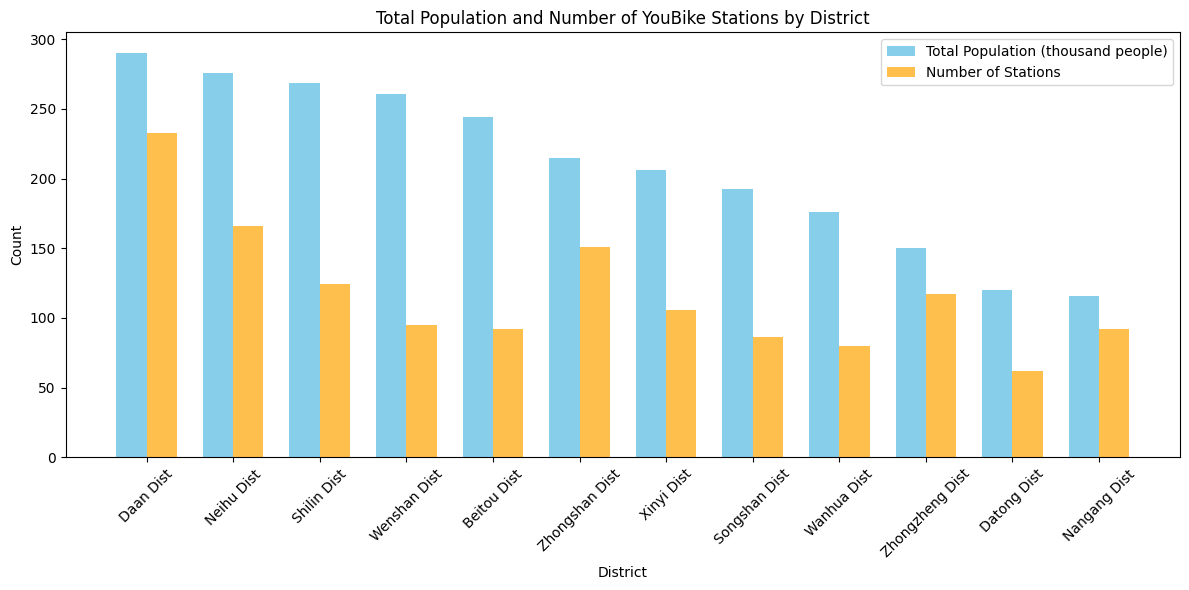

In [83]:
# Plotting

# Define the width of each bar
bar_width = 0.35

# Define the x-axis positions for each bar
x = np.arange(len(merged_df['sareaen']))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, merged_df['tot_population'], width=bar_width, color='skyblue', label='Total Population (thousand people)')
plt.bar(x + bar_width/2, merged_df['num_stations'], width=bar_width, color='orange', alpha=0.7, label='Number of Stations')
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Total Population and Number of YouBike Stations by District')
plt.xticks(x, merged_df['sareaen'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation of the data

1. Insight from the patterns of the real-time YouBike 2.0 data:
   
   The number of bikes available in residential areas is usually less than
   the number of bikes available in commercial areas during day time.

3. Top 10 most used/busiest YouBike 2.0 stations are busy at different times throughout the day.
4. Districts with more populations do not necessarily guarantee more YouBike 2.0 stations.

### Research Question 

The goal of this project is to investigate how the intricate interplay between mobility patterns, population demographics, and the availability and utilization of YouBike 2.0 stations could inform optimal locations for mobile vendors in Taipei City, Taiwan. The research question revolves around uncovering the spatial and temporal dynamics that underlie these relationships across different districts of the city.

The methodology will involve the analysis of several datasets such as real-time YouBike 2.0 data, population statistics by district, Taipei Metro station traffic patterns, and possibly some commercial data as well. The availability and utilization records of YouBike 2.0 stations, particularly the top 10 busiest stations, are the main focus areas that we will use for our analyses. On the other hand, information on the distribution of population within Taipei’s districts will enable us to understand the demographics better.

Furthermore, the hourly inbound and outbound traffic data from Taipei Metro stations will be analyzed to uncover the movement patterns in the city. Such an investigation would produce useful information about the habits of people who live locally and visitors regarding their movement within this urban area. In other aspects, commercial statistics can be looked into further to establish a relationship between economic activities in different areas and how they shape mobility trends.

By conducting these analyses, we aim to determine the most suitable places for mobile vendors in Taipei City. These studies will take into account factors like population density, transportation patterns, and economic activity through different times to propose a more convenient and adaptive way of living in Taipei City.

### Taipei Metro Station Hourly Inbound and Outbound Traffic Statistics

In [33]:
endpoint_mrt_url = "https://data.taipei/api/v1/dataset/eb481f58-1238-4cff-8caa-fa7bb20cb4f4?scope=resourceAquire"
response_mrt = requests.get(endpoint_mrt_url)

In [34]:
results_mrt = response_mrt.text
print(type(results_mrt))
print(results_mrt[:500])

<class 'str'>
{"result":{"limit":20,"offset":0,"count":85,"sort":"","results":[{"_id":1,"_importdate":{"date":"2024-02-19 09:13:37.996318","timezone_type":3,"timezone":"Asia\/Taipei"},"seqno":"1","年月":"201701","url":"http:\/\/tcgmetro.blob.core.windows.net\/stationod\/%E8%87%BA%E5%8C%97%E6%8D%B7%E9%81%8B%E6%AF%8F%E6%97%A5%E5%88%86%E6%99%82%E5%90%84%E7%AB%99OD%E6%B5%81%E9%87%8F%E7%B5%B1%E8%A8%88%E8%B3%87%E6%96%99_201701.csv"},{"_id":2,"_importdate":{"date":"2024-02-19 09:13:38.007263","timezone_type":3,"timezo


In [35]:
# parse the string into a Python dictionary (loads = "load string")
data_mrt = json.loads(results_mrt)
print(type(data_mrt))
list_of_mrt_station = list(data_mrt.items())
pp.pprint(list_of_mrt_station[:3])

<class 'dict'>
[('result',
  {'count': 85,
   'limit': 20,
   'offset': 0,
   'results': [{'_id': 1,
                '_importdate': {'date': '2024-02-19 09:13:37.996318',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                'seqno': '1',
                'url': 'http://tcgmetro.blob.core.windows.net/stationod/%E8%87%BA%E5%8C%97%E6%8D%B7%E9%81%8B%E6%AF%8F%E6%97%A5%E5%88%86%E6%99%82%E5%90%84%E7%AB%99OD%E6%B5%81%E9%87%8F%E7%B5%B1%E8%A8%88%E8%B3%87%E6%96%99_201701.csv',
                '年月': '201701'},
               {'_id': 2,
                '_importdate': {'date': '2024-02-19 09:13:38.007263',
                                'timezone': 'Asia/Taipei',
                                'timezone_type': 3},
                'seqno': '2',
                'url': 'http://tcgmetro.blob.core.windows.net/stationod/%E8%87%BA%E5%8C%97%E6%8D%B7%E9%81%8B%E6%AF%8F%E6%97%A5%E5%88%86%E6%99%82%E5%90%84%E7%AB%99OD%E6%B5%81%E9%87%8F%E

In [36]:
results_mrt_list = list_of_mrt_station[0][1]['results']
df_mrt = pd.DataFrame(results_mrt_list)
df_mrt

_id                                        _importdate seqno      年月  \
0     1  {'date': '2024-02-19 09:13:37.996318', 'timezo...     1  201701   
1     2  {'date': '2024-02-19 09:13:38.007263', 'timezo...     2  201702   
2     3  {'date': '2024-02-19 09:13:38.008925', 'timezo...     3  201703   
3     4  {'date': '2024-02-19 09:13:38.010403', 'timezo...     4  201704   
4     5  {'date': '2024-02-19 09:13:38.011946', 'timezo...     5  201705   
5     6  {'date': '2024-02-19 09:13:38.015106', 'timezo...     6  201706   
6     7  {'date': '2024-02-19 09:13:38.016567', 'timezo...     7  201707   
7     8  {'date': '2024-02-19 09:13:38.017934', 'timezo...     8  201708   
8     9  {'date': '2024-02-19 09:13:38.019276', 'timezo...     9  201709   
9    10  {'date': '2024-02-19 09:13:38.020864', 'timezo...    10  201710   
10   11  {'date': '2024-02-19 09:13:38.022341', 'timezo...    11  201711   
11   12  {'date': '2024-02-19 09:13:38.023652', 'timezo...    12  201712   
12   13  {'date': '2024-02-19 09:13:38.025083', 'timezo...    13  201801   
13   14  {'date': '2024-02-19 09:13:38.026491', 'timezo...    14  201802   
14   15  {'date': '2024-02-19 09:13:38.028095', 'timezo...    15  201803   
15   16  {'date': '2024-02-19 09:13:38.030211', 'timezo...    16  201804   
16   17  {'date': '2024-02-19 09:13:38.031608', 'timezo...    17  201805   
17   18  {'date': '2024-02-19 09:13:38.035741', 'timezo...    18  201806   
18   19  {'date': '2024-02-19 09:13:38.037298', 'timezo...    19  201807   
19   20  {'date': '2024-02-19 09:13:38.038656', 'timezo...    20  201808   

                                                  url  
0   http://tcgmetro.blob.core.windows.net/stationo...  
1   http://tcgmetro.blob.core.windows.net/stationo...  
2   http://tcgmetro.blob.core.windows.net/stationo...  
3   http://tcgmetro.blob.core.windows.net/stationo...  
4   http://tcgmetro.blob.core.windows.net/stationo...  
5   http://tcgmetro.blob.core.windows.net/stationo...  
6   http://tcgmetro.blob.core.windows.net/stationo...  
7   http://tcgmetro.blob.core.windows.net/stationo...  
8   http://tcgmetro.blob.core.windows.net/stationo...  
9   http://tcgmetro.blob.core.windows.net/stationo...  
10  http://tcgmetro.blob.core.windows.net/stationo...  
11  http://tcgmetro.blob.core.windows.net/stationo...  
12  http://tcgmetro.blob.core.windows.net/stationo...  
13  http://tcgmetro.blob.core.windows.net/stationo...  
14  http://tcgmetro.blob.core.windows.net/stationo...  
15  http://tcgmetro.blob.core.windows.net/stationo...  
16  http://tcgmetro.blob.core.windows.net/stationo...  
17  http://tcgmetro.blob.core.windows.net/stationo...  
18  http://tcgmetro.blob.core.windows.net/stationo...  
19  http://tcgmetro.blob.core.windows.net/stationo...